In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r"C:\Users\ANAND\Documents\GitHub\A-study-on-awareness-and-perceptionn-among-the-users-of-EVs\responces.csv")
df = df.drop(columns='Name', axis=1)
df.head()

,Gender,Age,Employment Status,Education Qualification,District,Area of Residence,which type of Vehicle do you have?,Do you have an Electric Vehicle?,1.1 Are electric vehicles better performing compared to fuel vehicles?,1.2 Are electric vehicles easy to drive then fuel vehicles?,...,4.5 How is the resale value of an EV's compared to a traditional fuel vehicles?,5.1 How familiar are you with EV’s and their features?,5.2 Are you attracted to EV’s because of the technological advancement?,5.3 Are you satisfied with the range of EV’s comparing to traditional fuel vehicles?,"5.4 If you were to buy a vehicle, would you consider EV’s?",5.5 What do you think of the government encouraging e-vehicle sales?,6.1 Are electric vehicles polluting like other traditional fuel vehicles?,"6.2 What is your opinion about that the absents of tailpipe emissions from EV’s contributes to better air quality, reducing pollutants that can have adverse effects on human health and the environment?","6.3 Because electric vehicles are soundless than traditional vehicles, do they reduce noise pollution especially in public spaces?",6.4 Are the applications of EV’s support to eco- friendly transportation?
0,Female,18 - 27,Student,Post Graduate,Coimbatore,Urban,Petrol,No,fair,neutral,...,High,familiar,Attracted,Very satisfied,Somewhat considered,Good,Similar to others,Neutral,Reduce,neutral
1,Male,18 - 27,Student,Post Graduate,coimbatore,Rural,Diesel,Yes,good,neutral,...,Low,Very unfamiliar,Highly not attracted,moderately satisfied,Somewhat considered,Average,Highly polluting,Useless,Didn't reduce,support
2,Male,18 - 27,Student,Post Graduate,coimbatore,Rural,Petrol,Yes,poor,very easy,...,Very low,familiar,Not attracted,Very satisfied,Somewhat considered,Fair,Not polluting,Usefull,Definitely reduce,definitely support
3,Male,18 - 27,Student,Post Graduate,Viruthunagar,Urban,Diesel,Yes,very poor,very hard,...,Neutral,Somewhat familiar,Highly not attracted,moderately satisfied,Not considered,Fair,Similar to others,Usefull,Reduce,neutral
4,Female,18 - 27,Student,Post Graduate,Dharmapuri,Urban,Petrol,No,good,neutral,...,High,familiar,Not attracted,Slightly satisfied,Somewhat considered,Fair,slightly polluting,Neutral,Reduce,neutral


In [10]:
import prince

mca = prince.MCA(n_components=2)
mca = mca.fit(df)

mca_transformed = mca.transform(df)
print(mca_transformed.head())

          0         1
0 -0.589186  0.195962
1 -0.855224  1.209656
2 -0.064843  0.444071
3 -0.603958  0.988007
4 -0.528074  0.164144


In [11]:
# Convert to numpy array
mca_transformed_np = mca_transformed.to_numpy()


In [12]:
from sklearn.clu import KModes

# Specify the number of clusters
n_clusters = 3

# Initialize the K-Modes model
kmodes = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=1)

# Fit the model to the MCA-transformed data and predict cluster assignments
clusters = kmodes.fit_predict(mca_transformed_np)

# Print the cluster assignments
print(clusters)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 396.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 396.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 396.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 396.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 396.0
Best run was number 1
[0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

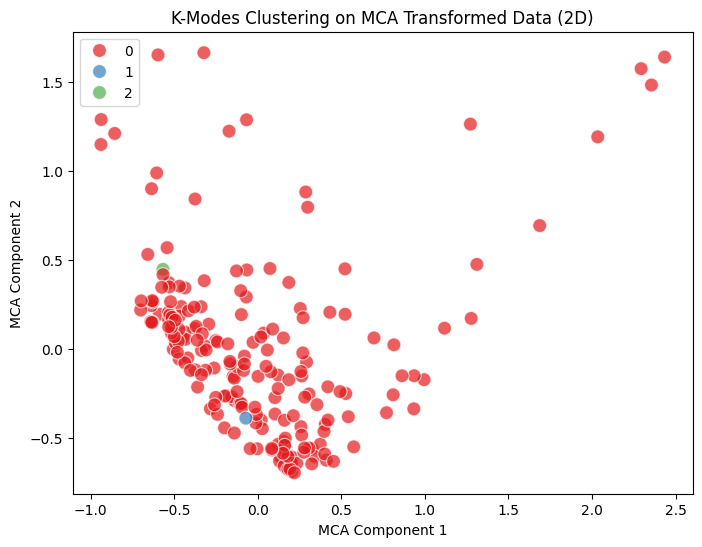

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming mca_transformed has two components
plt.figure(figsize=(8, 6))

# Create a scatter plot, coloring by clusters
sns.scatterplot(x=mca_transformed_np[:, 0], y=mca_transformed_np[:, 1], hue=clusters, palette='Set1', s=100, alpha=0.7)

# Set plot labels and title
plt.title('K-Modes Clustering on MCA Transformed Data (2D)')
plt.xlabel('MCA Component 1')
plt.ylabel('MCA Component 2')

# Show the plot
plt.show()
